# Modelo de Hodking - Huxley para impulsos nerviosos

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")


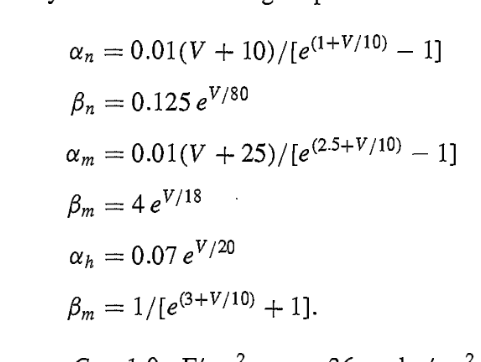

In [70]:
#Gates
Vr=-70
def alfn(V):
  "alpha_n"
  return 0.01*(10-(V-Vr))/(np.exp(1-(V-Vr)/10)-1)
def betn(V):
  "betha_n"
  return 0.125*np.exp(-(V-Vr)/80)
def alfm(V):
    "alpha_m"
    return 0.1*(-(V-Vr)+25)/(np.exp(2.5-(V-Vr)/10)-1)
def betm(V):
    "betha_m"
    return 4*np.exp(-(V-Vr)/18)
def alfh(V):
    "alpha_h"
    return 0.07*np.exp(-(V-Vr)/20)
def beth(V):
  "betha_h"
  return 1/(np.exp(3-(V-Vr)/10)+1)


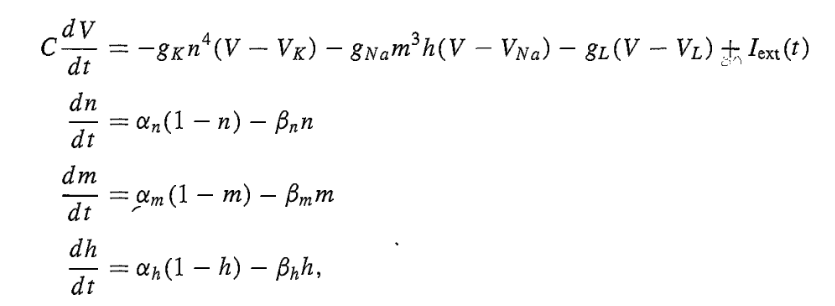

In [71]:
                                                                             #Caso General
#Corriente Externa. Ejemplo

def general(iex = 5.4):
  def Iext(t,iex):
    "funcion arbritraria de corrientes externas que afecten el impulso nervioso"
    if (t>=0 and t<1) or t>2:
      return 0
    else:
      return iex
  x=np.linspace(0,20,50)
  Iex=[]
  for i in x:
    Iex.append(Iext(i,iex))

  #Parametros Inicicales
  V0=-70
  n0=0.315
  m0=0.042
  h0=0.608
  T0=0
  TF=40
  DT=0.1

  #Resolucion de las ecuadiones acopladas
  #y[0]=V, y[1]=n, y[2]=m, y[3]=h
  def fderiv(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
    return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + Iext(t,iex)),
                    (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                    (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                    (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
  sol = solve_ivp(fderiv, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))

  fig,ax = plt.subplots(3,1,figsize=(14,33))

  ax[0].plot(x,Iex)
  ax[0].set_xlabel("Tiempo [ms]")
  ax[0].set_ylabel("Corriente Externa [μA]")
  ax[0].set_title("Corriente Externa Inducida",fontsize=30,fontweight="bold")

  ax[1].plot(sol.t, sol.y[1], label=r"n")
  ax[1].plot(sol.t, sol.y[2], label=r"m")
  ax[1].plot(sol.t, sol.y[3], label=r"h")
  ax[1].set_xlabel(r"$t$[ms]")
  ax[1].set_ylabel(r"Proportion of Open Gates")
  ax[1].set_title("Caso No Steady-State",fontsize=30,fontweight="bold")
  ax[1].legend()

  ax[2].plot(sol.t, sol.y[0], label=f"Con Pulso de Corriente = {iex} [μA]")
  ax[2].set_xlabel("Tiempo [ms]")
  ax[2].set_ylabel("V[mV]")
  ax[2].set_title("Potencial de la membrana",fontsize=30,fontweight="bold")
  ax[2].legend()


interact(general, iex=(0,6,0.2))

interactive(children=(FloatSlider(value=5.4, description='iex', max=6.0, step=0.2), Output()), _dom_classes=('…

<function __main__.general(iex=5.4)>

In [74]:
#Steady State
#a)
v = np.linspace(-100,100,200)

def graficar(Vr = -69):
    def alfn(V):
        "alpha_n"
        return 0.01*(10-(V-Vr))/(np.exp(1-(V-Vr)/10)-1)
    def betn(V):
        "betha_n"
        return 0.125*np.exp(-(V-Vr)/80)
    def alfm(V):
        "alpha_m"
        return 0.1*(-(V-Vr)+25)/(np.exp(2.5-(V-Vr)/10)-1)
    def betm(V):
        "betha_m"
        return 4*np.exp(-(V-Vr)/18)
    def alfh(V):
        "alpha_h"
        return 0.07*np.exp(-(V-Vr)/20)
    def beth(V):
        "betha_h"
        return 1/(np.exp(3-(V-Vr)/10)+1)

    n= alfn(v)/(alfn(v)+ betn(v))
    m= alfm(v)/(alfm(v)+ betm(v))
    h= alfh(v)/(alfh(v)+ beth(v))


    plt.figure(figsize=(14,6))
    plt.plot(v,n ,label=r"n")
    plt.plot(v,m ,label=r"m")
    plt.plot(v,h ,label=r"h")
    plt.xlabel(r"$V$[mV]")
    plt.ylabel(r"Proportion Open Gates")
    plt.title("n(V), m(V) y h(V)",fontweight="bold")
    plt.legend()
    


interact(graficar, Vr=(-100,60))

interactive(children=(IntSlider(value=-69, description='Vr', max=60, min=-100), Output()), _dom_classes=('widg…

<function __main__.graficar(Vr=-69)>

In [75]:
#Punto c
def grapher(c=5):
  def Iext1(t, c):
    "funcion arbritraria de corrientes externas que afecten el impulso nervioso"
    if (t>=0 and t<1) or t>2:
      return 0
    else:
      return c
  
  V0=-70
  n0=0.315
  m0=0.042
  h0=0.608
  T0=0
  TF=40
  DT=0.1


  def fderiv1(t, y, C, gk, Vk, gNa, VNa, gL, VL, c): 
    return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + Iext1(t, c)),
                    (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                    (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                    (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])


  fig, ax = plt.subplots(figsize=(14,8))
  d = c-0.2
  e = d-0.2
  sol1 = solve_ivp(fderiv1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59, c))
  sol2 = solve_ivp(fderiv1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59, d))
  sol3 = solve_ivp(fderiv1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59, e))
  ax.plot(sol1.t, sol1.y[0], label=f"I = {np.round(c,decimals=2)} [μA]")
  ax.plot(sol2.t, sol2.y[0], label=f"I = {np.round(d,decimals=2)} [μA]")
  ax.plot(sol3.t, sol3.y[0], label=f"I = {np.round(e,decimals=2)}[μA]")
  ax.set_ylabel(f"$V\:[mV]$")
  ax.set_xlabel(f"$t\:[ms]$")
  ax.legend()

interact(grapher, c= (-2,10,0.1))
# COMIENZAN A HABER PICOS DESDE I_EXT = 5.4 ###

interactive(children=(FloatSlider(value=5.0, description='c', max=10.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.grapher(c=5)>

C:\Users\andre\AppData\Local\Temp\ipykernel_22260\3634856133.py:5: RuntimeWarning: overflow encountered in exp
  return 0.01*(10-(V-Vr))/(np.exp(1-(V-Vr)/10)-1)
C:\Users\andre\AppData\Local\Temp\ipykernel_22260\3634856133.py:11: RuntimeWarning: overflow encountered in exp
  return 0.1*(-(V-Vr)+25)/(np.exp(2.5-(V-Vr)/10)-1)
C:\Users\andre\AppData\Local\Temp\ipykernel_22260\3634856133.py:14: RuntimeWarning: overflow encountered in exp
  return 4*np.exp(-(V-Vr)/18)
C:\Users\andre\AppData\Local\Temp\ipykernel_22260\3634856133.py:17: RuntimeWarning: overflow encountered in exp
  return 0.07*np.exp(-(V-Vr)/20)
C:\Users\andre\AppData\Local\Temp\ipykernel_22260\3634856133.py:20: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(3-(V-Vr)/10)+1)
C:\Users\andre\AppData\Local\Temp\ipykernel_22260\3634856133.py:8: RuntimeWarning: overflow encountered in exp
  return 0.125*np.exp(-(V-Vr)/80)


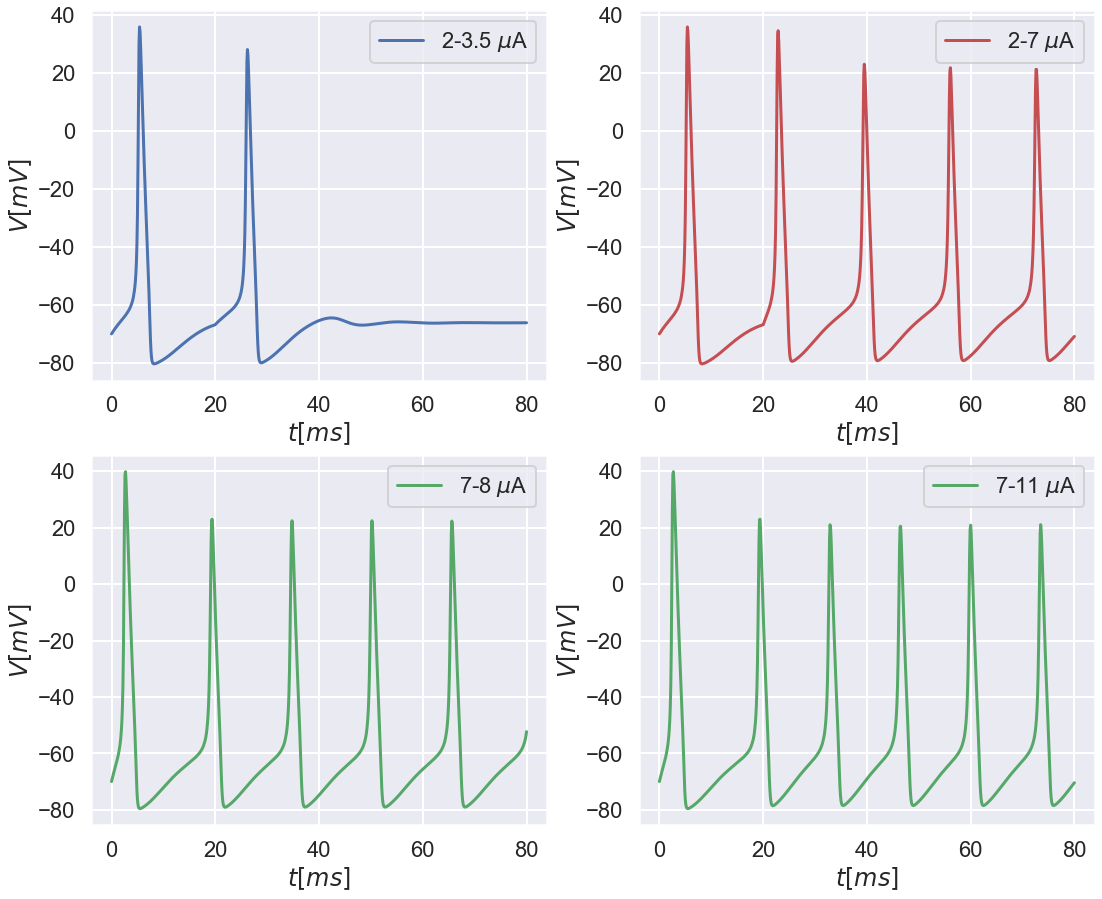

In [77]:
def d1Iext(t):
  if  t<20:
    return 2
  else:
    return 3.5
def d2Iext(t):
  if  t<20:
    return 2
  else:
    return 7
def d3Iext(t):
  if  t<20:
    return 7
  else:
    return 8
def d4Iext(t):
  if  t<20:
    return 7
  else:
    return 11
T0=0
TF=80
V0=-70
n0=0.315
m0=0.042
h0=0.608


def fderivdelta1(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d1Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
def fderivdelta2(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d2Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
def fderivdelta3(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d3Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])  
def fderivdelta4(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d4Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(18,15))
figsize=(10,8)
sol1 = solve_ivp(fderivdelta1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol2 = solve_ivp(fderivdelta2, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol3 = solve_ivp(fderivdelta3, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol4 = solve_ivp(fderivdelta4, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
ax1.plot(sol1.t, sol1.y[0],"b",label=r"2-3.5 $\mu$A")
ax2.plot(sol2.t, sol2.y[0],"r",label=r"2-7 $\mu$A")
ax3.plot(sol3.t, sol3.y[0],"g",label=r"7-8 $\mu$A")
ax4.plot(sol4.t, sol4.y[0],"g",label=r"7-11 $\mu$A")
ax1.set_ylabel("$V[mV]$")
ax1.set_xlabel("$t[ms]$")
ax2.set_ylabel("$V[mV]$")
ax2.set_xlabel("$t[ms]$")
ax3.set_ylabel("$V[mV]$")
ax3.set_xlabel("$t[ms]$")
ax4.set_ylabel("$V[mV]$")
ax4.set_xlabel("$t[ms]$")
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()